# Waze Project
**Phase 4 - Regression analysis: Simplify complex data relationships**

Our team is more than halfway through their user churn project. Earlier we used Python to explore and analyze Waze’s user data, created data visualizations, and conducted a hypothesis test. Now, leadership wants our team to build a regression model to predict user churn based on a variety of variables.

In this project, I will build a binomial logistic regression model. Logistic regression helps estimate the probability of churn based on driver features we have in our dataset. This opens the door for much more thorough and flexible analysis. To be more precise, we use the result of Logistice Regeression as a baseline for the Machine Learning models we develop in the next phase of this project.
<br/>

**The purpose** of this project is to demostrate knowledge of exploratory data analysis (EDA) and a binomial logistic regression model.

**The goal** is to build a binomial logistic regression model and evaluate the model's performance.
<br/>

*This project has three steps:*

**Step 1:** Exploratory Data Analysis
* What are some purposes of EDA before constructing a binomial logistic regression model?
  
**Step 2:** Preparing Data
* Checking Model Assumptions*
  
**Step 3:** Model Bulding
* What resources do you find yourself using as you complete this stage?
  
**Step 4:** Interpreting Model Results
* What key insights emerged from your model(s)?
* What business recommendations do you propose based on the models built?

In [1]:

# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


## 1. Explore and Prepare Data
**What are some purposes of EDA before constructing a binomial logistic regression model?**

* Outliers and extreme data values can significantly impact logistic regression models. After visualizing data, make a plan for addressing outliers by dropping rows, substituting extreme data with average data, and/or removing data values greater than 3 standard deviations.
* EDA activities also include identifying missing data to help the analyst make decisions on their exclusion or inclusion by substituting values with dataset means, medians, and other similar methods.
* Additionally, it can be useful to create variables by multiplying variables together or calculating the ratio between two variables. For example, in this dataset you can create a drives_sessions_ratio variable by dividing drives by sessions.

In [2]:
df = pd.read_csv('waze_dataset.csv')
df.head(3)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android


In [43]:
print(df.shape)
df.info()

(14999, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [44]:
# Check the class balance of the dependent (target) variable, label.
df['label'].value_counts(normalize=True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

### Remove Irrelevant Columns

In [3]:
# Drop the ID column
df.drop('ID', axis=1, inplace=True)
df.columns

Index(['label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device'],
      dtype='object')

### Handle Missing Values
**Question:** Are there any missing values in your data?

> *Yes, the `label` column is missing 700 values.*<br>
> We know from previous EDA that there is no evidence of a non-random cause of the 700 missing values in the `label` column, and because these observations comprise less than 5% of the data, I use the `dropna()` method to drop the rows that are missing this data.


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
dtypes: float64(3), int64(7), object(2)
memory usage: 1.4+ MB


In [4]:
# Drop rows with missing data in `label` column
df.dropna(subset=['label'], inplace=True)
df['label'].info()

<class 'pandas.core.series.Series'>
Index: 14299 entries, 0 to 14998
Series name: label
Non-Null Count  Dtype 
--------------  ----- 
14299 non-null  object
dtypes: object(1)
memory usage: 223.4+ KB


### Handle Outliers
**Question:** Are there any variables that could potentially have outliers just by assessing at the quartile values, standard deviation, and max values?

> *Yes, the following columns all seem to have outliers:*
> *All of these columns have max values that are multiple standard deviations above the 75th percentile. This could indicate outliers in these variables.*
<br>
* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`

We rarely want to drop outliers, and generally will not do so unless there is a clear reason for it (e.g., typographic errors). At times outliers can be changed to the **median, mean, 95th percentile, etc.**<br>
For this analysis, I impute the outlying values for these columns. i.e. calculate the **95th percentile** of each column and change to this value any value in the column that exceeds it.


In [48]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [5]:
# Impute outliers
for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
               'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']:
    threshold = df[column].quantile(0.95)
    df.loc[df[column] > threshold, column] = threshold

df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000


### Feature Engineering
Create features that may be of interest to the stakeholder and/or that are needed to address the business scenario/problem.
#### km_per_driving_day
We know from earlier EDA that churn rate correlates with distance driven per driving day in the last month. It might be helpful to engineer a feature that captures this information.
1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.
2. Call the `describe()` method on the new column.

In [6]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.429900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.675616e+02
50%      3.237524e+02
75%      7.415597e+02
max               inf
Name: km_per_driving_day, dtype: float64

Some values are infinite. This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

In [7]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14299.000000
mean       567.010426
std        970.136935
min          0.000000
25%        136.168003
50%        273.301012
75%        543.473676
max       8898.716275
Name: km_per_driving_day, dtype: float64

#### professional_driver

Create a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives <u>**and**</u> drove on 15+ days in the last month.

**Note:** The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, we use domain knowledge and intuition to determine these deciding thresholds, but ultimately they are arbitrary.

In [8]:
# Create `professional_driver` column
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

In [9]:
# 1. Check count of professionals and non-professionals
print("Statistics of professional drivers:")
print(df['professional_driver'].value_counts())

# 2. Check in-class churn rate
print("\nProfessional drivers and their churn rate:")
df.groupby(['professional_driver'])['label'].value_counts(normalize=True)

Statistics of professional drivers:
professional_driver
0    11811
1     2488
Name: count, dtype: int64

Professional drivers and their churn rate:


professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: proportion, dtype: float64

The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This seems like it could add predictive signal to the model.

### Variable Encoding
We have two categorical columns in this dataset; `label` and `device`. To train a logistice regression model (and most of machine learning models), we have to change them to numeric values (The technichal jargon for this action is `dumification`).
For the `label` column:
* `retained` -> `0`
* `churned` -> `1`
I save this variable as `blabel` as to not overwrite the original `label` variable.<br>

And for the `device` columns:
* `Android` -> `0`
* `iPhone` -> `1`
I save this variable as `bdevice` as to not overwrite the original `device` variable.<br>


There are many ways to do this. I use `np.where()` as I did earlier in this notebook.
In cases with many categorical variables, we can use pandas built-in [`pd.get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), or use scikit-learn's [`OneHotEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) function.

**Note:** Variables with many categories should only be dummied if absolutely necessary. Each category will result in a coefficient for our model which can lead to overfitting.


In [10]:
# Create binary `label2` column
df['blabel'] = np.where(df['label']=='churned', 1, 0)

# Create new `bdevice` variable
df['bdevice'] = np.where(df['device']=='Android', 0, 1)

df[['device', 'bdevice', 'label', 'blabel']].tail()

,device,bdevice,label,blabel
14994,iPhone,1,retained,0
14995,Android,0,retained,0
14996,iPhone,1,retained,0
14997,iPhone,1,churned,1
14998,iPhone,1,retained,0


## 2. Check the Required Condition

The required condition for logistic regression:
* Independent observations (This refers to how the data was collected.)
* No extreme outliers
* Little to no multicollinearity among X predictors
* Linear relationship between X and the **logit** of y
* Normality of residuals with a constant variance

**Question:** How to check if the required condition is met?
>- For the first condition, we can assume that observations are independent for this project.
>- The second assumption has already been addressed.
>- Colinearity will be addressed shortly.
>- The third assumption will be verified next.
>- The last assumption will be checked after the model is build.

We should keep in mind that in practice, modeling assumptions are often violated, and depending on the specifics of our use case and the severity of the violation, it might not affect our model much at all or it will result in a failed model.

### Collinearity

To check for collinearity, let's generate a correlation matrix.

In [11]:
# Generate a correlation matrix
# Remove 'label' and 'device' (categorical columns) to avoid getting error from corr method
df_corr = df.drop(columns=['label','device'])
df_corr.corr(method='pearson')

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,blabel,bdevice
sessions,1.000000,0.996942,0.597189,0.007101,0.001858,0.008536,0.002996,-0.004545,0.025113,0.020294,-0.012540,0.443654,0.034911,0.012704
drives,0.996942,1.000000,0.595285,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,0.019608,-0.011929,0.444425,0.035865,0.011684
total_sessions,0.597189,0.595285,1.000000,0.006596,0.000187,0.010371,0.001016,-0.000338,0.015755,0.012953,-0.015717,0.254433,0.024568,0.012138
n_days_after_onboarding,0.007101,0.006940,0.006596,1.000000,-0.002450,-0.004968,-0.004652,-0.010167,-0.009418,-0.007321,0.011043,0.003770,-0.129263,-0.011299
total_navigations_fav1,0.001858,0.001058,0.000187,-0.002450,1.000000,0.002866,-0.007368,0.005646,0.010902,0.010419,0.000246,-0.000224,0.052322,-0.001316
total_navigations_fav2,0.008536,0.009505,0.010371,-0.004968,0.002866,1.000000,0.003559,-0.003009,-0.004425,0.002000,0.004993,0.007126,0.015032,-0.000275
driven_km_drives,0.002996,0.003445,0.001016,-0.004652,-0.007368,0.003559,1.000000,0.690515,-0.007441,-0.009549,0.334646,-0.000904,0.019767,-0.002091
duration_minutes_drives,-0.004545,-0.003889,-0.000338,-0.010167,0.005646,-0.003009,0.690515,1.000000,-0.007895,-0.009425,0.233281,-0.012128,0.040407,-0.007709
activity_days,0.025113,0.024357,0.015755,-0.009418,0.010902,-0.004425,-0.007441,-0.007895,1.000000,0.947687,-0.414868,0.453825,-0.303851,-0.010221
driving_days,0.020294,0.019608,0.012953,-0.007321,0.010419,0.002000,-0.009549,-0.009425,0.947687,1.000000,-0.424977,0.469776,-0.294259,-0.003859


Now, plot a correlation heatmap.

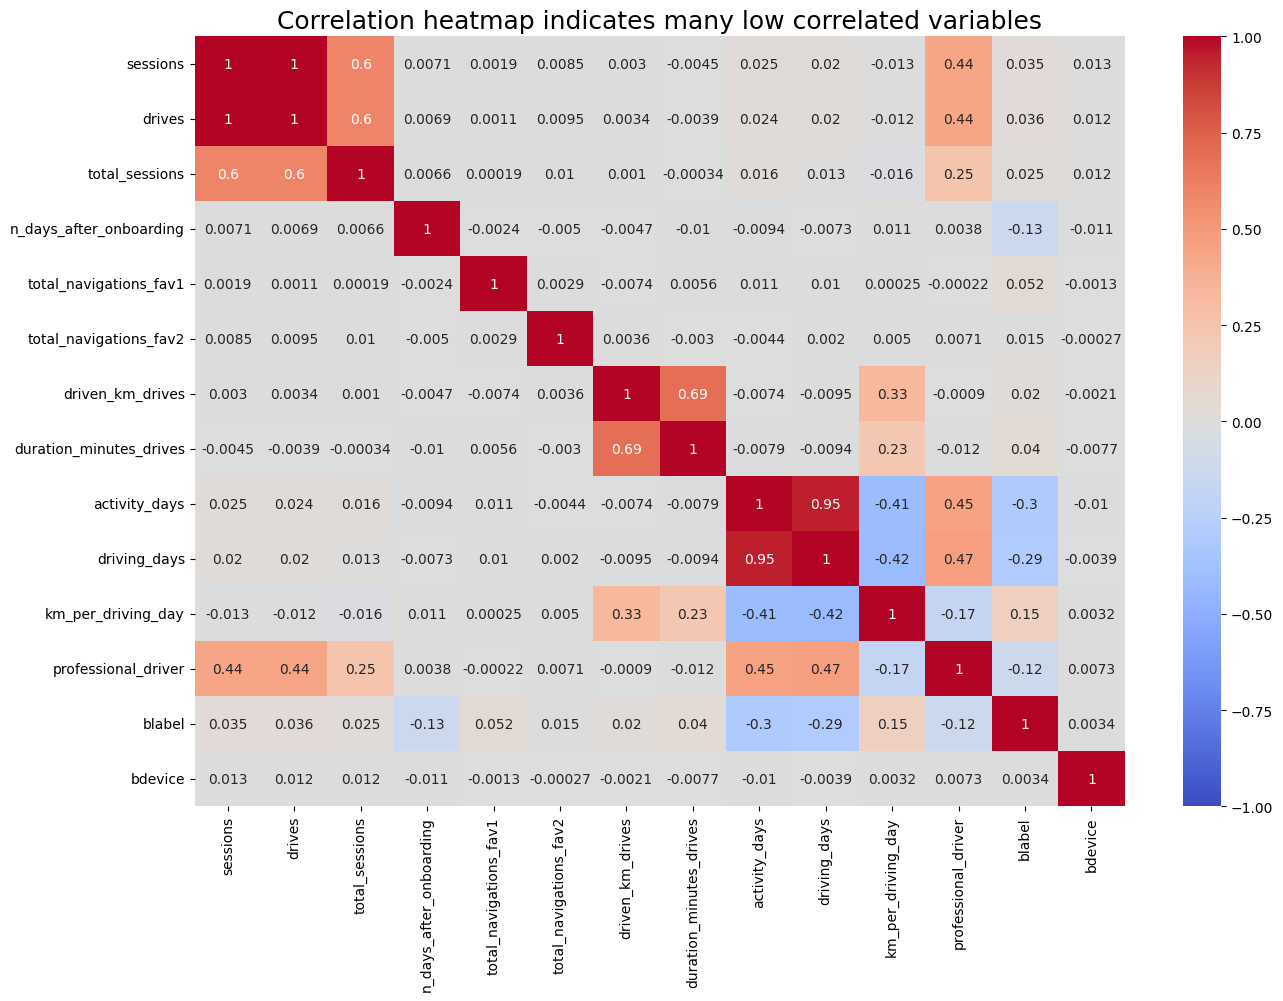

In [12]:
# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df_corr.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show();

If there are predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7**, these variables are strongly multicollinear. Therefore, only one of these variables should be used in the model.

**Note:** 0.7 is an arbitrary threshold. Some industries may use 0.6, 0.8, etc.

**Question:** Which variables are multicollinear with each other?

> `sessions` and `drives`: 1.0<br>
> `driving_days` and `activity_days`: 0.95

## 3. Build Logistic Regression Model

### Assign predictor variables and target

To build our model we need to determine what X variables we want to include in our model to predict the target&mdash;`blabel`.

Drop the following variables and assign the results to `X`:

* `label` (this is the target)
* `blabel` (this is the target)
* `device` (this is the non-binary-encoded categorical variable)
* `sessions` (this had high multicollinearity)
* `driving_days` (this had high multicollinearity)

**Note:** `sessions` and `driving_days` were selected to be dropped, rather than `drives` and `activity_days`. The reason for this is that the features that were kept for modeling had slightly stronger correlations with the target variable than the features that were dropped.


In [13]:
# Isolate predictor variables
X = df.drop(columns = ['label', 'blabel', 'device', 'sessions', 'driving_days'])
y = df['blabel']


After analysis and deriving variables with close relationships, it is time to begin constructing the model.
In this stage, the following question is relevant.<br>
* Why did you select the X variables you did?
> *Initially, columns were dropped based on high multicollinearity. Later, variable selection can be fine-tuned by running and rerunning models to look at changes in accuracy, recall, and precision.*
<br>
> *Initial variable selection was based on the business objective and insights from prior EDA.* Some additional features that may be of interest to the stakeholder and/or that are needed to address the business scenario/problem were created.

### Split the data

**Note:** Because the target class is imbalanced (82% retained vs. 18% churned), you want to make sure that you don't get an unlucky split that over- or under-represents the frequency of the minority class. Set the function's `stratify` parameter to `y` to ensure that the minority class appears in both train and test sets in the same proportion that it does in the overall dataset.

In [14]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [15]:
# Use .head()
X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,bdevice
152,108,186.192746,3116,243,124,8898.716275,4668.180092,24,593.247752,1,1
11899,2,3.487590,794,114,18,3286.545691,1780.902733,5,3286.545691,0,1
10937,139,347.106403,331,4,7,7400.838975,2349.305267,15,616.736581,0,0
669,108,455.439492,2320,11,4,6566.424830,4558.459870,18,410.401552,1,1
8406,10,89.475821,2478,135,0,1271.248661,938.711572,27,74.779333,0,1


### Fit the Model

In [16]:
# Instantiate the LogisticRegression class
# It is important to add `penalty = 'none'` since your predictors are unscaled.

model = LogisticRegression(max_iter=1000)
# Fit the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Calling the `.coef_` attribute on the model gives the coefficients of each variable.  The coefficients are in order of how the variables are listed in the dataset.  Remember that the coefficients represent the change in the **log odds** of the target variable for **every one unit increase in X**.

In [17]:
pd.Series(model.coef_[0], index=X.columns)

drives                     0.001948
total_sessions             0.000367
n_days_after_onboarding   -0.000400
total_navigations_fav1     0.001258
total_navigations_fav2     0.001010
driven_km_drives          -0.000011
duration_minutes_drives    0.000110
activity_days             -0.105279
km_per_driving_day         0.000017
professional_driver       -0.010453
bdevice                    0.016648
dtype: float64

The model's `intercept_` attribute gives the intercept of the model.

In [18]:
model.intercept_

array([-0.06452365])

### Check final assumption

Verify the linear relationship between X and the estimated log odds (known as logits) by making a regplot.

The model's `predict_proba()` method generates the probability of response for each sample in the training data. This results in a 2-D array where each row represents a user in `X_train`. The first column is the probability of the user not churning, and the second column is the probability of the user churning.

In [19]:
# Get the predicted probabilities of the training data
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.93692341, 0.06307659],
       [0.62496476, 0.37503524],
       [0.76515616, 0.23484384],
       ...,
       [0.91798075, 0.08201925],
       [0.84852392, 0.15147608],
       [0.93303803, 0.06696197]])

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where _p_ is the probability of response:

$$
logit(p) = ln(\frac{p}{1-p})
$$

1. Create a dataframe called `logit_data` that is a copy of `df`.

2. Create a new column called `logit` in the `logit_data` dataframe. The data in this column should represent the logit for each user.


In [29]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

Plot a regplot where the x-axis represents an independent variable and the y-axis represents the log-odds of the predicted probabilities.

In an exhaustive analysis, this would be plotted for each continuous or discrete predictor variable. Here we show only `driving_days`.

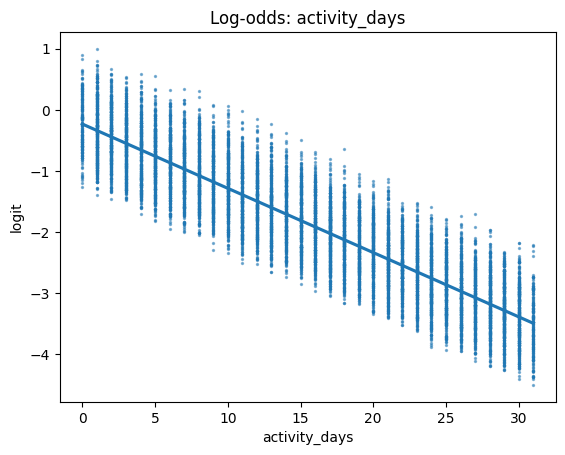

In [21]:
# Plot regplot of `activity_days` log-odds
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: activity_days');

## 4. Results and evaluation

If the logistic assumptions are met, the model results can be appropriately interpreted.

In [31]:
# Generate predictions on X_test
y_preds = model.predict(X_test)

# Score the model (accuracy) on the test data
model.score(X_test, y_test)

0.8248951048951049

### Confusion matrix

In [32]:
cm = confusion_matrix(y_test, y_preds)

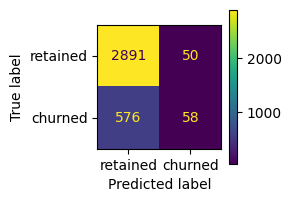

In [38]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained', 'churned'],
                              )
fig, ax = plt.subplots(figsize=(2,2))
disp.plot(ax=ax);

In [39]:
# Calculate precision manually
precision = cm[1,1] / (cm[0, 1] + cm[1, 1])
precision

np.float64(0.5370370370370371)

In [40]:
# Calculate recall manually
recall = cm[1,1] / (cm[1, 0] + cm[1, 1])
recall

np.float64(0.0914826498422713)

In [36]:
# Create a classification report
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.52      0.09      0.16       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575



**Note:** The model has mediocre precision and very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.

### BONUS

Generate a bar graph of the model's coefficients for a visual representation of the importance of the model's features.

In [41]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('bdevice', np.float64(0.016648087461405055)),
 ('drives', np.float64(0.001947751917064989)),
 ('total_navigations_fav1', np.float64(0.0012578101144574431)),
 ('total_navigations_fav2', np.float64(0.0010102278667043399)),
 ('total_sessions', np.float64(0.0003669889413250796)),
 ('duration_minutes_drives', np.float64(0.00011025018518142402)),
 ('km_per_driving_day', np.float64(1.6901019841833485e-05)),
 ('driven_km_drives', np.float64(-1.1458693611502312e-05)),
 ('n_days_after_onboarding', np.float64(-0.00039973264681267555)),
 ('professional_driver', np.float64(-0.010452805215354759)),
 ('activity_days', np.float64(-0.10527862878205319))]

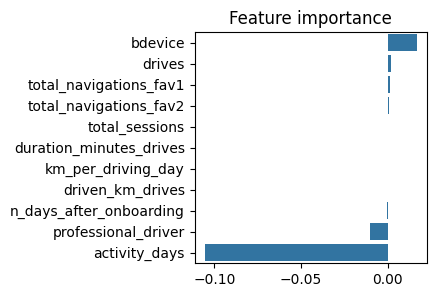

In [44]:
# Plot the feature importances
import seaborn as sns
plt.figure(figsize=(3,3))
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');

## 5. Conclusion

Now that I've built my regression model, the next step is to share my findings with the Waze leadership team considering the following questions while preparing to write my executive summary.

**Questions:**


1. What variable most influenced the model's prediction? How? Was this surprising?
> _`activity_days` was by far the most important feature in the model. It had a negative correlation with user churn. This was not surprising, as this variable was very strongly correlated with `driving_days`, which was known from EDA to have a negative correlation with churn._

2. Were there any variables that you expected to be stronger predictors than they were?
> _Yes. In previous EDA, user churn rate increased as the values in `km_per_driving_day` increased. The correlation heatmap here in this notebook revealed this variable to have the strongest positive correlation with churn of any of the predictor variables by a relatively large margin. In the model, it was the second-least-important variable._

3. Why might a variable you thought to be important not be important in the model?
> _In a multiple logistic regression model, features can interact with each other and these interactions can result in seemingly counterintuitive relationships. This is both a strength and a weakness of predictive models, as capturing these interactions typically makes a model more predictive while at the same time making the model more difficult to explain. In addition to that, our data is imbalanced which may effect the weights._

4. Would you recommend that Waze use this model? Why or why not?
> _It depends. What would the model be used for? If it's used to drive consequential business decisions, then no. The model is not a strong enough predictor, as made clear by its poor recall score. However, if the model is only being used to guide further exploratory efforts, then it can have value._

5. What could you do to improve this model?
> _New features could be engineered to try to generate better predictive signal, as they often do if you have domain knowledge. In the case of this model, one of the engineered features (`professional_driver`) was the third-most-predictive predictor. It could also be helpful to scale the predictor variables, and/or to reconstruct the model with different combinations of predictor variables to reduce noise from unpredictive features._

6. What additional features would you like to have to help improve the model?
> _It would be helpful to have drive-level information for each user (such as drive times, geographic locations, etc.). It would probably also be helpful to have more granular data to know how users interact with the app. For example, how often do they report or confirm road hazard alerts? Finally, it could be helpful to know the monthly count of unique starting and ending locations each driver inputs._